# Exploratory Data Analysis

All dependencies for this notebook is listed in the requirements.txt file. One parent above the nbs directory. This list will keep changing as we add to it so be sure to rerun this line after every `git pull`

First step lets mount our drive and connect to kaggle

In [59]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
%cd gdrive/My Drive/UCI/cs274p

[Errno 2] No such file or directory: 'gdrive/My Drive/UCI/cs274p'
/content/gdrive/My Drive/UCI/cs274p


In [61]:
!pip install -r requirements.txt

Lets declare our imports

In [0]:
import numpy as np
import torch
from torch import nn
import math
from pprint import pprint
from tqdm.notebook import tqdm

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files

In [65]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isakbosman","key":"6c881bed68ec6f6aa33439ed065ecd59"}\n'}

In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [69]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-03 22:53:52          46709  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           2154  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        357KB  2020-04-09 21:07:26           2417  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            523  
bappekim/air-pollution-in-seoul               

In [70]:
! kaggle datasets download -d datasnaek/youtube-new

 97% 195M/201M [00:02<00:00, 81.4MB/s]
100% 201M/201M [00:02<00:00, 96.1MB/s]


In [0]:
! unzip youtube-new.zip

Archive:  youtube-new.zip
  inflating: CA_category_id.json     
  inflating: CAvideos.csv            
  inflating: DE_category_id.json     
  inflating: DEvideos.csv            
  inflating: FR_category_id.json     
  inflating: FRvideos.csv            
  inflating: GB_category_id.json     
  inflating: GBvideos.csv            
  inflating: IN_category_id.json     
  inflating: INvideos.csv            
  inflating: JP_category_id.json     
  inflating: JPvideos.csv            
  inflating: KR_category_id.json     
  inflating: KRvideos.csv            
  inflating: MX_category_id.json     
  inflating: MXvideos.csv            
  inflating: RU_category_id.json     
  inflating: RUvideos.csv            
  inflating: US_category_id.json     
  inflating: USvideos.csv            


In [71]:
! ls

code  images	   nbs	      requirements.txt
data  kaggle.json  README.md  youtube-new.zip


In [0]:
! rm youtube-new.zip && mkdir data/youtube && mv *.json data/youtube/ && mv *.csv data/youtube

In [0]:
! ls data/youtube

CA_category_id.json  GBvideos.csv	  KRvideos.csv
CAvideos.csv	     IN_category_id.json  MX_category_id.json
DE_category_id.json  INvideos.csv	  MXvideos.csv
DEvideos.csv	     JP_category_id.json  RU_category_id.json
FR_category_id.json  JPvideos.csv	  RUvideos.csv
FRvideos.csv	     kaggle.json	  US_category_id.json
GB_category_id.json  KR_category_id.json  USvideos.csv


In [0]:
import json
data = json.load(open('data/youtube/US_category_id.json'))

In [73]:
from pprint import pprint
pprint(data['items'][0])

{'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'kind': 'youtube#videoCategory',
 'snippet': {'assignable': True,
             'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
             'title': 'Film & Animation'}}


In [0]:
import pandas as pd
df = pd.read_csv('data/youtube/USvideos.csv')

In [76]:
df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [78]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [79]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [0]:
!pip install seaborn plotly pygal

     |████████████████████████████████| 133kB 622kB/s 


In [0]:
! pip freeze > requirements.txt

Lets setup plotly for visualization

In [80]:
df.comments_disabled.describe()

count     40949
unique        2
top       False
freq      40316
Name: comments_disabled, dtype: object

In [0]:
channels = df.groupby('channel_title') \
           .agg({'video_id':'count', 'views': 'sum', 'likes': 'sum', 'comment_count': 'sum'}) \
           .reset_index() \
           .rename(columns={'channel_title': 'Channel', 'video_id':'Videos', 'views':'View Sum', 'likes':'Like Sum', 'comment_count':'Comment Sum'}) \
           .sort_values(by=['Videos'], ascending=False).head(20)

In [84]:
channels.head(20)

,Channel,Videos,View Sum,Like Sum,Comment Sum
358,ChildishGambinoVEVO,25,3758488765,96700818,10151289
2094,ibighit,80,2235906679,199247121,31817464
541,Dude Perfect,131,1870085178,60275557,4009163
1129,Marvel Entertainment,125,1808998971,55873344,6453560
110,ArianaGrandeVevo,43,1576959172,52170970,4295333
1107,MalumaVEVO,32,1551515831,23278380,1227634
2112,jypentertainment,64,1486972132,44900910,7575510
1614,Sony Pictures Entertainment,88,1432374398,30106808,3533551
650,FoxStarHindi,32,1238609854,23762509,1782776
177,BeckyGVEVO,20,1182971286,19185287,1176862


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

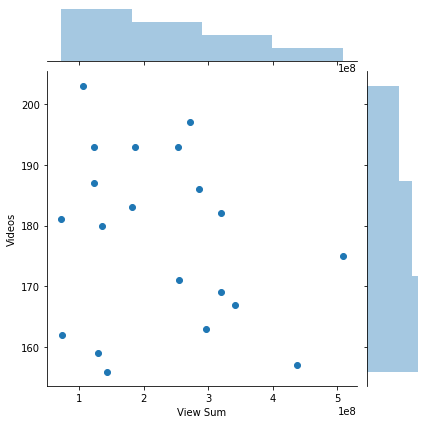

In [88]:
sns.jointplot(x="View Sum", y="Videos", data=channels);

#Histogram

Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

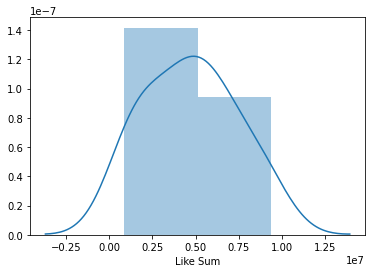

In [90]:
sns.distplot(channels['Like Sum'], kde = True)
plt.show()

What if we add in the Kernel Density Estimation

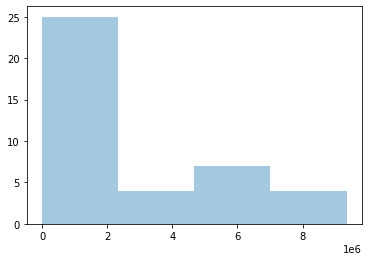

In [91]:
sns.distplot(channels[['Videos','Like Sum']], kde=False)

#Scatterplot Matrix

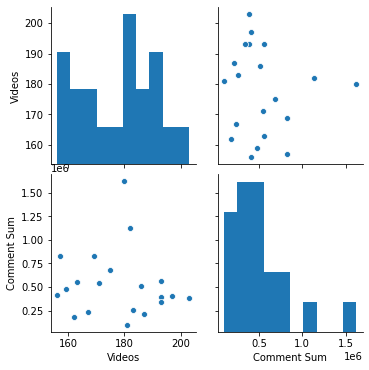

In [92]:
sns.pairplot(channels[['Videos', 'Comment Sum']])

# Box plot

Distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

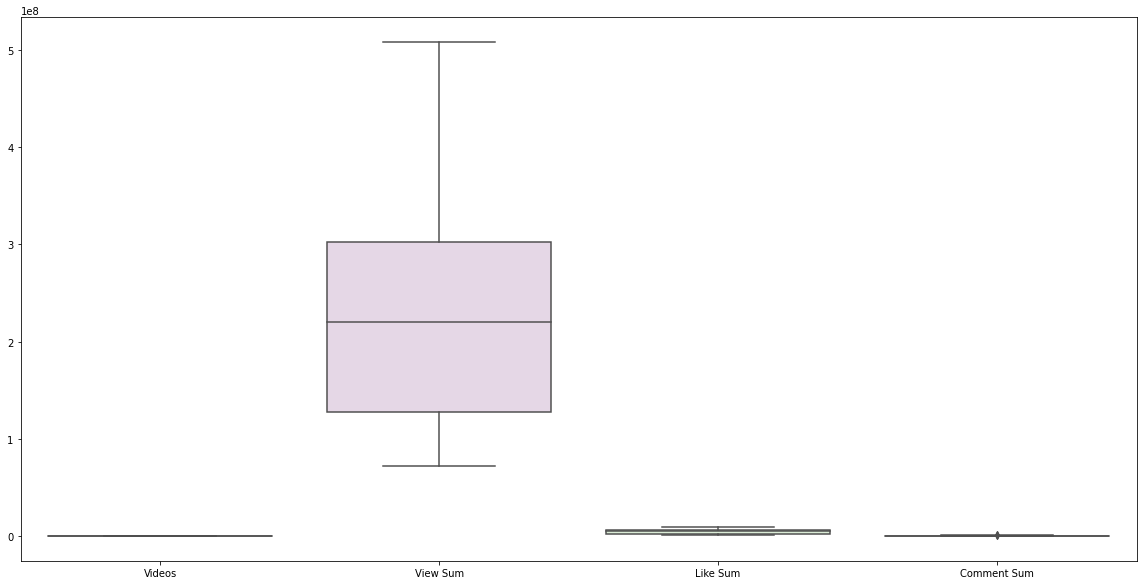

In [93]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(data=channels,palette="PRGn",ax=ax)
plt.show()

#Violin Plot

Box plot with the addition of a rotated kernel density plot showing the probability density at different values
It allows you the see the distribution when the quartilles remain the same

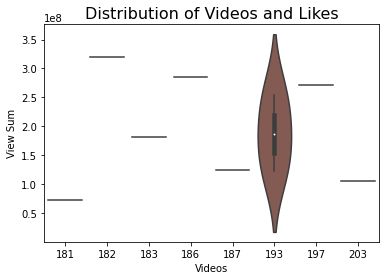

In [94]:
ax = sns.violinplot(x="Videos", y="View Sum", data=channels[channels.Videos>180])
ax.set_title('Distribution of Videos and Likes', fontsize=16);

# PyTorch Data Utilities

## Dataset class
`torch.utils.data.Dataset` is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

- \_\_len\_\_ so that len(dataset) returns the size of the dataset.
- \_\_getitem\_\_ to support the indexing such that dataset[i] can be used to get ith sample

# Built in functionality for images

In [0]:
import torch
from torchvision import transforms, datasets

## Tansforms

PyTorch allows for built in and custom transforms

In [0]:
data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

## DataLoader Class
Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.

In [0]:
training_dataset = datasets.ImageFolder(root='path/to/train/data,
                                           transform=data_transform)

In [0]:
dataset_loader = torch.utils.data.DataLoader(training_dataset,
                                             batch_size=4, shuffle=True,
                                             num_workers=4)

#Excercises

1. Load your own dataset and start visualizing it
2. What are some useful features you can generate 
3. Can you write your own Dataset class
4. Implement the Dataset loader and try batch size and sampler